In [1]:
import os
import sys
import torch
import numpy as np

from Datasets.Datasets_Functions import *
from Visualization import Visualization

from Related_Codes.IDECAutoencoder import IDECAutoencoder, IDECCDAutoencoder
from General_Functions import General_Functions

In [2]:
path_to_module = './'
sys.path.append(path_to_module)
os.environ['OMP_NUM_THREADS'] = '6'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)
print(device)

cuda:0


In [3]:
hashmap_path = path_to_module + 'Datasets/'
hashmap = get_hashmap(hashmap_path)
dataset_name = "r100"
dataset_properties = hashmap[dataset_name]
batch_size = dataset_properties['batch_size'] = 256
n_clusters = dataset_properties['n_clusters'] 
dataloader, input_dim, data_np, labels = function_get_dataset(dataset_name, dataset_properties)

[nltk_data] Downloading package punkt to C:\Users\PAPASOFT
[nltk_data]     INC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\PAPASOFT
[nltk_data]     INC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
visualization = Visualization()

### IDec

In [5]:
n_clusters = dataset_properties['n_clusters']

# Batch Size and Number of Clusters
batch_size = dataset_properties['batch_size']

# Pre-Training Epochs and Learning Rate
n_pret_epochs = 100
pret_lr = 5e-4

# Lamdas, Training Epochs and Learning Rate
n_epochs = 100
lr = 5e-4
alpha = 1.0
gamma = 0.1
momentum = 0.9
latent_dim = 2
n_channels = 1
negative_slope = 0 
is_MLP_AE = True

if(is_MLP_AE):
    idec_autoencoder = IDECAutoencoder(device=device, n_clusters=n_clusters, input_dim=input_dim, latent_dim=latent_dim , negative_slope=negative_slope)
else:  
    input_dim = 1
    idec_autoencoder = IDECCDAutoencoder(device=device, n_clusters=n_clusters, input_dim=input_dim, latent_dim=latent_dim, negative_slope=negative_slope, n_channels=n_channels) 
idec_autoencoder.set_general_training_variables(dataloader=dataloader, batch_size=batch_size)
idec_autoencoder.set_pretraining_variables(n_pret_epochs=n_pret_epochs, pret_lr=pret_lr)
idec_autoencoder.set_training_variables(n_epochs=n_epochs, lr=lr, momentum=momentum, alpha=alpha, gamma=gamma)
idec_autoencoder.set_path_variables(path_to_module=path_to_module, dataset_name=dataset_name)
idec_autoencoder.set_path()
idec_autoencoder = idec_autoencoder.to(device)

pretrain = True
if(pretrain):
    idec_autoencoder.pretrain_autoencoder()
    idec_autoencoder.save_pretrained_weights()
else:
    model_save_path = idec_autoencoder.data_dir_path + '/Weigths/autoencoder_weights.pth'
    idec_autoencoder.load_state_dict(torch.load(model_save_path))

Epoch: 0, Loss: 5.602536
Epoch: 1, Loss: 3.797536
Epoch: 2, Loss: 2.848106
Epoch: 3, Loss: 2.345099
Epoch: 4, Loss: 1.638768
Epoch: 5, Loss: 1.383251
Epoch: 6, Loss: 1.476705
Epoch: 7, Loss: 1.453459
Epoch: 8, Loss: 1.154492
Epoch: 9, Loss: 1.656388
Epoch: 10, Loss: 1.115476
Epoch: 11, Loss: 0.931637
Epoch: 12, Loss: 1.231003
Epoch: 13, Loss: 0.937268
Epoch: 14, Loss: 0.788568
Epoch: 15, Loss: 0.804911
Epoch: 16, Loss: 0.692799
Epoch: 17, Loss: 0.618934
Epoch: 18, Loss: 0.446121
Epoch: 19, Loss: 0.439402
Epoch: 20, Loss: 0.454933
Epoch: 21, Loss: 0.350471
Epoch: 22, Loss: 0.235215
Epoch: 23, Loss: 0.216287
Epoch: 24, Loss: 0.206224
Epoch: 25, Loss: 0.191529
Epoch: 26, Loss: 0.181320
Epoch: 27, Loss: 0.147225
Epoch: 28, Loss: 0.171189
Epoch: 29, Loss: 0.160234
Epoch: 30, Loss: 0.133253
Epoch: 31, Loss: 0.122582
Epoch: 32, Loss: 0.122860
Epoch: 33, Loss: 0.113436
Epoch: 34, Loss: 0.128582
Epoch: 35, Loss: 0.117823
Epoch: 36, Loss: 0.111861
Epoch: 37, Loss: 0.100008
Epoch: 38, Loss: 0.173

In [6]:
idec_autoencoder.kmeans_initialization()
idec_autoencoder.train_autoencoder()
cluster_centers = idec_autoencoder.get_cluster_centers()
_, idec_autoencoder_reduced_data, labels = idec_autoencoder.get_latent_data()
General_Functions().save_excel(idec_autoencoder.data_dir_path, idec_autoencoder.df_eval)

ACC: 0.95 PUR: 0.95 NMI: 0.85 ARI: 0.87


C:\Users\PAPASOFT INC\AppData\Roaming\Python\Python310\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Ep: 0 Rec L: 0.1275 Cl L: 0.6185 ACC: 0.97 PUR: 0.97 NMI: 0.91 ARI: 0.93
Ep: 1 Rec L: 0.0837 Cl L: 0.6357 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Ep: 2 Rec L: 0.0908 Cl L: 0.6492 ACC: 0.99 PUR: 0.99 NMI: 0.96 ARI: 0.97
Ep: 3 Rec L: 0.0936 Cl L: 0.6538 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Ep: 4 Rec L: 0.0707 Cl L: 0.6616 ACC: 0.99 PUR: 0.99 NMI: 0.96 ARI: 0.98
Ep: 5 Rec L: 0.0678 Cl L: 0.6657 ACC: 0.99 PUR: 0.99 NMI: 0.96 ARI: 0.98
Ep: 6 Rec L: 0.0791 Cl L: 0.6705 ACC: 0.99 PUR: 0.99 NMI: 0.96 ARI: 0.98
Ep: 7 Rec L: 0.1021 Cl L: 0.6736 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Ep: 8 Rec L: 0.0945 Cl L: 0.6795 ACC: 0.99 PUR: 0.99 NMI: 0.94 ARI: 0.96
Ep: 9 Rec L: 0.0854 Cl L: 0.6808 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Ep: 10 Rec L: 0.1059 Cl L: 0.6853 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Ep: 11 Rec L: 0.0896 Cl L: 0.6882 ACC: 0.99 PUR: 0.99 NMI: 0.96 ARI: 0.98
Ep: 12 Rec L: 0.0662 Cl L: 0.6874 ACC: 0.99 PUR: 0.99 NMI: 0.95 ARI: 0.97
Ep: 13 Rec L: 0.0697 Cl L: 0.6872 ACC: 0.99 PUR:

C:\Users\PAPASOFT INC\Documents\GitHub\Soft-Silhouette\General_Functions.py:23: FutureWarning: Setting the `book` attribute is not part of the public API, usage can give unexpected or corrupted results and will be removed in a future version
  writer.book = workbook
C:\Users\PAPASOFT INC\Documents\GitHub\Soft-Silhouette\General_Functions.py:27: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


Directory './Results/r100/IDECAE/100_Eps_ld_2_out_4_bs_256_lr_0.0005_momentum_0.9_alpha_1.0_gamma_0.1/Experiments/No_TSNE' already exists.


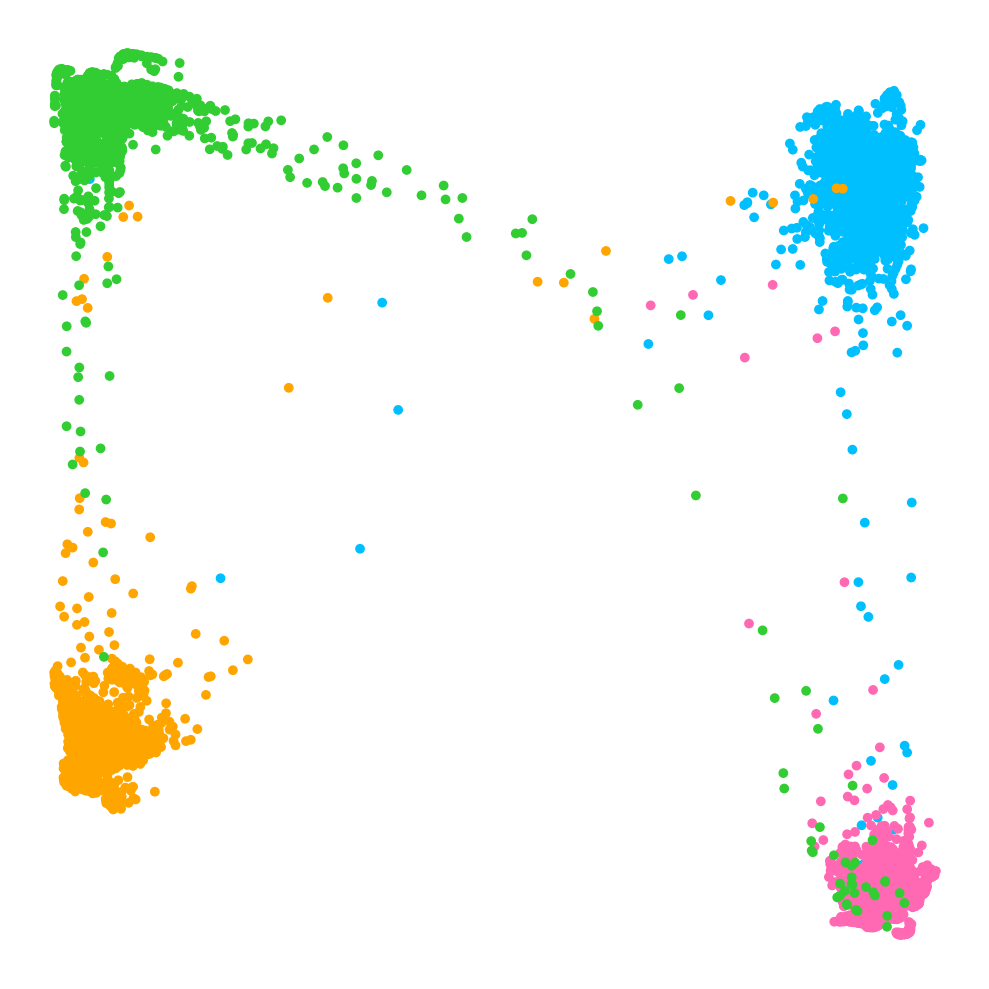

In [7]:
visualization.plot(idec_autoencoder_reduced_data, labels, labels, cluster_centers, idec_autoencoder.data_dir_path)